## Import

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [4]:
physical_model = "MIST"
path_to_data = "../../../../../../data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = "../../../../../../results/K_fold/"
path_to_predictions = "../../../../../../predictions/K_fold"
tag = "radius_bigger_0_5"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


log10_isochrone_age_yr  log_Teff     log_g  phase  metallicity  \
0                           5.0  3.486221  3.131342   -1.0        -0.25   
1                           5.0  3.487362  3.126808   -1.0        -0.25   
2                           5.0  3.489243  3.119367   -1.0        -0.25   
3                           5.0  3.491102  3.112165   -1.0        -0.25   
4                           5.0  3.492937  3.105143   -1.0        -0.25   
...                         ...       ...       ...    ...          ...   
1467117                    10.3  4.402490  7.777159    6.0         0.50   
1467118                    10.3  4.387132  7.783242    6.0         0.50   
1467119                    10.3  4.371789  7.789130    6.0         0.50   
1467120                    10.3  4.356480  7.794844    6.0         0.50   
1467121                    10.3  4.341226  7.800376    6.0         0.50   

         star_mass     log_R  
0         0.100000  0.153402  
1         0.102645  0.160326  
2         0.107039  0.171785  
3         0.111419  0.183099  
4         0.115789  0.194305  
...            ...       ...  
1467117   0.532726 -1.806255  
1467118   0.532730 -1.809295  
1467119   0.532735 -1.812237  
1467120   0.532741 -1.815091  
1467121   0.532749 -1.817854  

[1467122 rows x 7 columns]

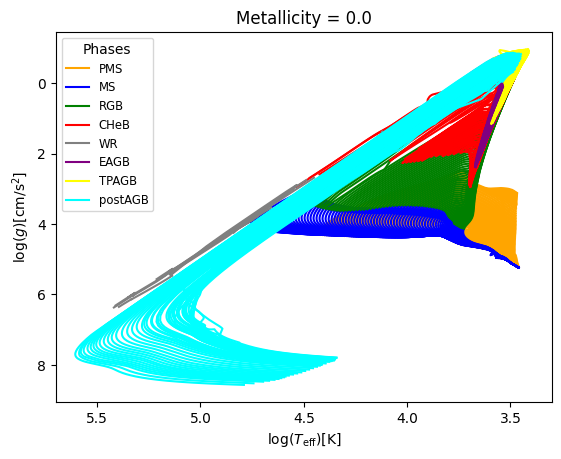

In [5]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [6]:
print_uniques("log_R", iso_df)
# print_uniques_count("log_R", iso_df)

log_R : 1467122 unique values, range [-2.100746699589491, 3.1297545143214007]


log10_isochrone_age_yr  log_Teff     log_g  phase  metallicity  \
0                           5.0  4.494412  4.346972    0.0        -0.25   
1                           5.0  4.497517  4.345776    0.0        -0.25   
2                           5.0  4.500556  4.344580    0.0        -0.25   
3                           5.0  4.504040  4.343050    0.0        -0.25   
4                           5.0  4.507576  4.341483    0.0        -0.25   
...                         ...       ...       ...    ...          ...   
1140739                    10.3  3.425746 -0.551440    5.0         0.50   
1140740                    10.3  3.426469 -0.560350    5.0         0.50   
1140741                    10.3  3.427744 -0.566057    5.0         0.50   
1140742                    10.3  3.429413 -0.569225    5.0         0.50   
1140743                    10.3  3.431389 -0.569398    5.0         0.50   

         star_mass     log_R  
0        13.584360  0.610679  
1        13.765512  0.614753  
2        13.942887  0.618755  
3        14.591712  0.624670  
4        15.426062  0.631187  
...            ...       ...  
1140739   0.602856  2.384899  
1140740   0.598549  2.387797  
1140741   0.594116  2.389036  
1140742   0.589648  2.388981  
1140743   0.585631  2.387582  

[1140744 rows x 7 columns]

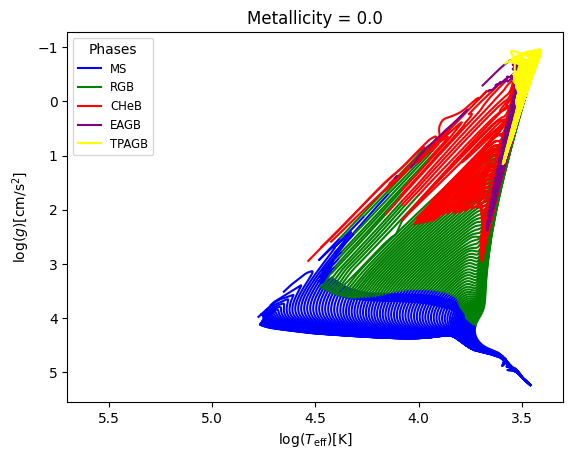

In [7]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [8]:
print_uniques("log_R", phase_filtered_iso_df)
# print_uniques_count("log_R", phase_filtered_iso_df)

log_R : 1140744 unique values, range [-0.9974747647513328, 3.1297545143214007]


log10_isochrone_age_yr  log_Teff     log_g  phase  metallicity  \
0                          5.0  4.494412  4.346972    0.0        -0.25   
1                          5.0  4.497517  4.345776    0.0        -0.25   
2                          5.0  4.500556  4.344580    0.0        -0.25   
3                          5.0  4.504040  4.343050    0.0        -0.25   
4                          5.0  4.507576  4.341483    0.0        -0.25   
...                        ...       ...       ...    ...          ...   
889516                    10.3  3.425746 -0.551440    5.0         0.50   
889517                    10.3  3.426469 -0.560350    5.0         0.50   
889518                    10.3  3.427744 -0.566057    5.0         0.50   
889519                    10.3  3.429413 -0.569225    5.0         0.50   
889520                    10.3  3.431389 -0.569398    5.0         0.50   

        star_mass     log_R  
0       13.584360  0.610679  
1       13.765512  0.614753  
2       13.942887  0.618755  
3       14.591712  0.624670  
4       15.426062  0.631187  
...           ...       ...  
889516   0.602856  2.384899  
889517   0.598549  2.387797  
889518   0.594116  2.389036  
889519   0.589648  2.388981  
889520   0.585631  2.387582  

[889521 rows x 7 columns]

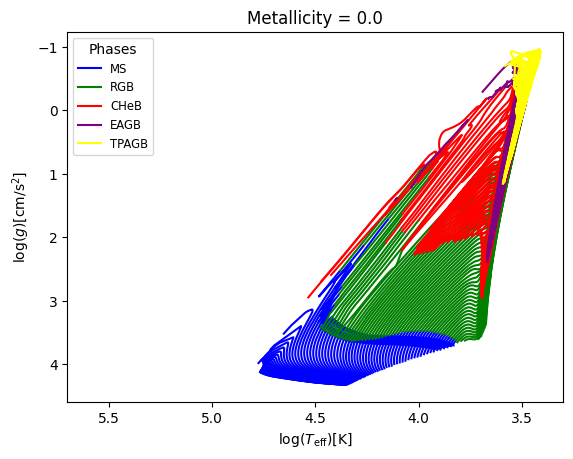

In [9]:
phase_radius_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], 'log_R' : (">", 0.5)})
display(phase_radius_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_radius_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [10]:
print_all_uniques(phase_radius_filtered_iso_df)

log10_isochrone_age_yr  : Range : 5.0 - 10.3, Mean : 8.4736, Median : 8.55

log_Teff  : Range : 3.35 - 5.1219, Mean : 3.7918, Median : 3.636

log_g  : Range : -1.14 - 5.2269, Mean : 1.37, Median : 0.8281

Values in phase column : 0.0, 2.0, 3.0, 4.0, 5.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

star_mass  : Range : 0.51 - 298.5448, Mean : 8.9974, Median : 2.282

log_R  : Range : 0.5 - 3.1298, Mean : 1.7821, Median : 1.9663



In [11]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_radius_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.5087345425706472 - 298.5447575808816
Median value in train data for the mass parameter: 2.283159861265946
Mean value in train data for the mass parameter: 8.993732867411694
Range in train data for the radius parameter : 0.5000126974127559 - 3.1297545143214007
Median value in train data for the radius parameter: 1.966207278319632
Mean value in train data for the radius parameter: 1.7822438483885092

Testing set statistics:
Range in test data for the mass parameter : 0.5088032677588237 - 294.46210248118973
Median value in test data for the mass parameter: 2.278925380342001
Mean value in test data for the mass parameter: 9.008475980585649
Range in test data for the radius parameter : 0.5000006893164242 - 3.109885771548777
Median value in test data for the radius parameter: 1.9664824517791504
Mean value in test data for the radius parameter: 1.7814729963494385

(667140, 4) (222381, 4)
(667140, 2) (222381, 2)


## Model training

### Linear regression

In [10]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


radius_bigger_0_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.4277454650411461
RMSE :  17.294941418653902
MAE :  7.872278578529201
MedAE :  4.180154179163683
CORR :  0.6540225265356298
MAX_ER :  247.6140787360441
Percentiles : 
  75th percentile :  8.79435495434581
  90th percentile :  17.90507385258317
  95th percentile :  21.331354525320336
  99th percentile :  71.14382882358021



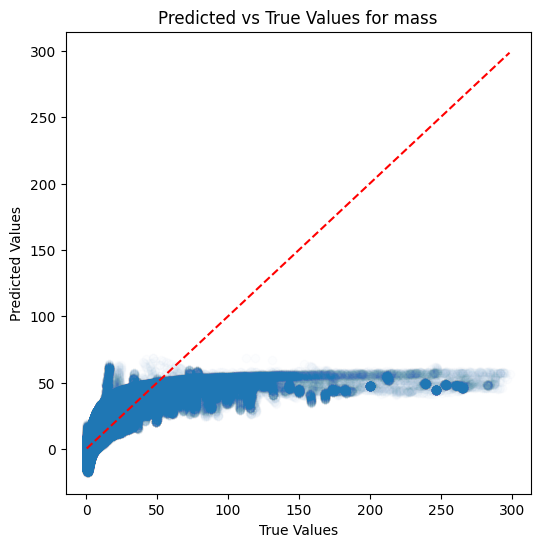

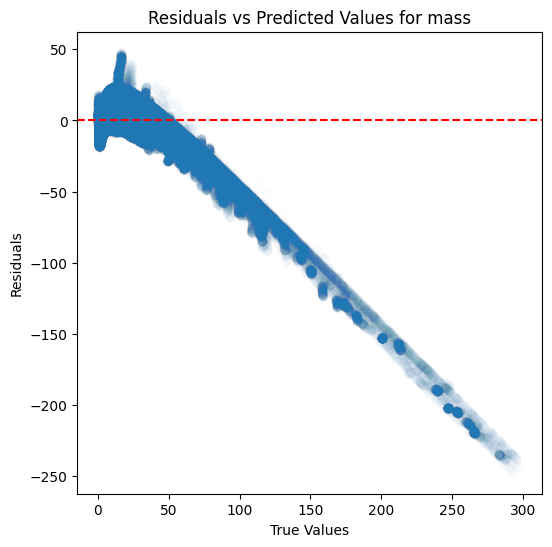

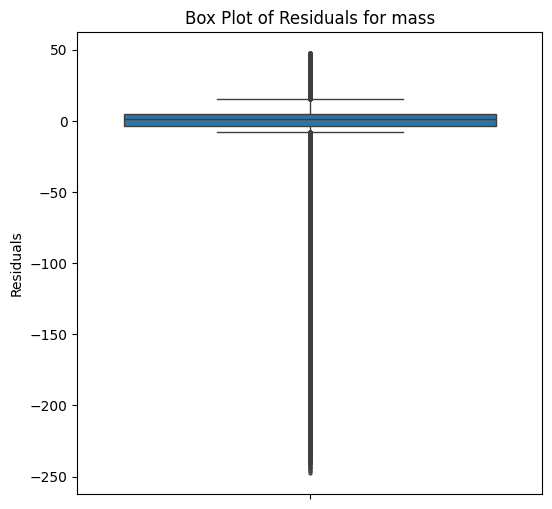

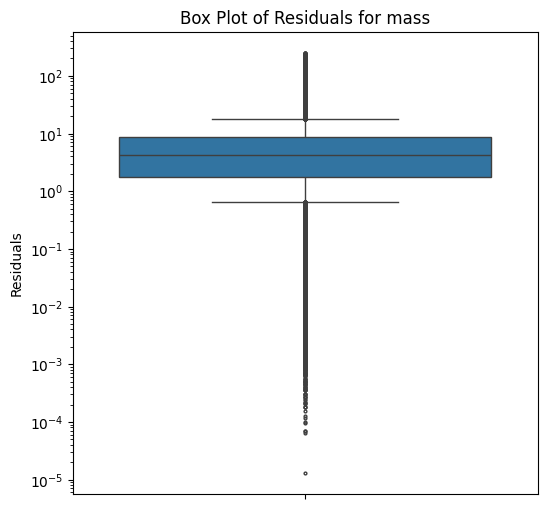

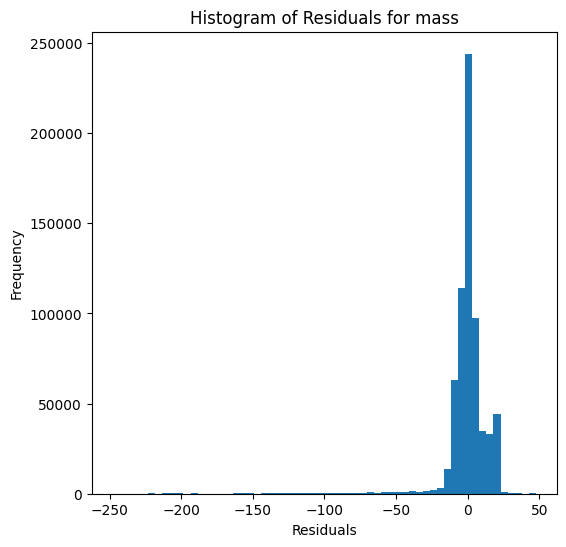

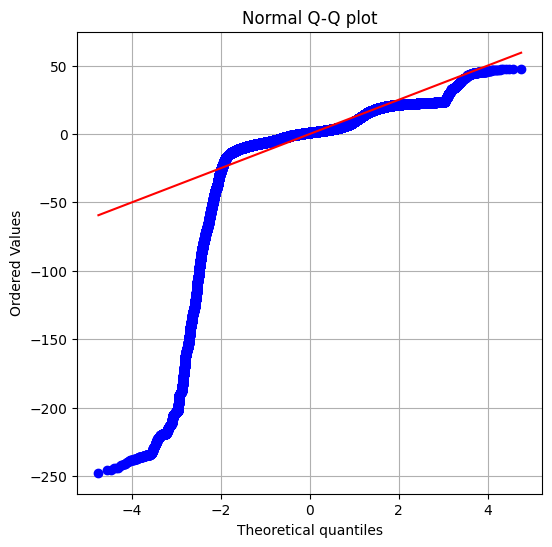


radius results:
RVE :  0.9845858982700071
RMSE :  0.08295696674189092
MAE :  0.052679241652856416
MedAE :  0.033327950025210384
CORR :  0.9922630186951493
MAX_ER :  0.4631015404601526
Percentiles : 
  75th percentile :  0.06175609031098561
  90th percentile :  0.12425801854761977
  95th percentile :  0.19328535923191156
  99th percentile :  0.3251019047593927



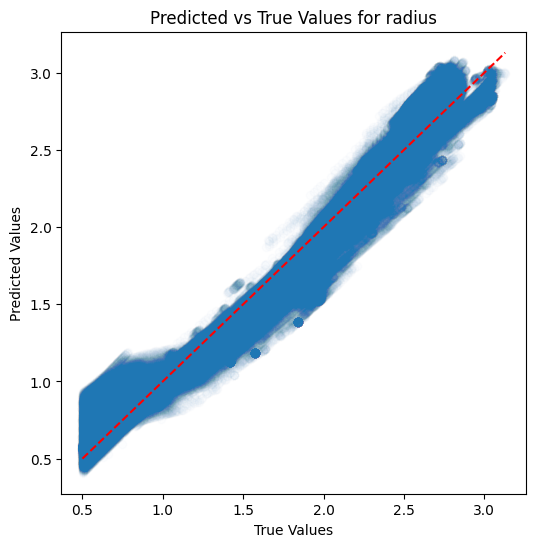

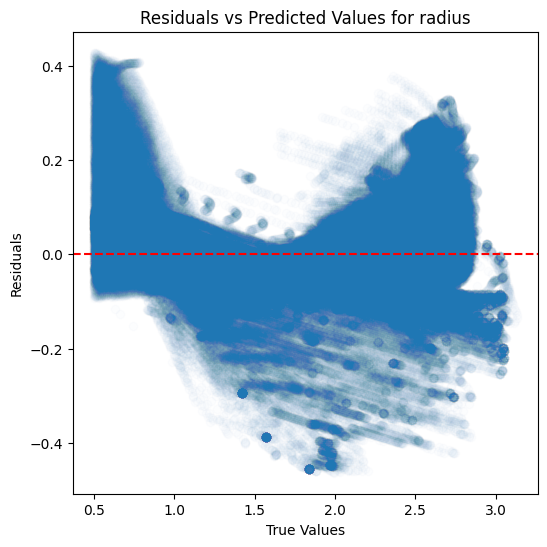

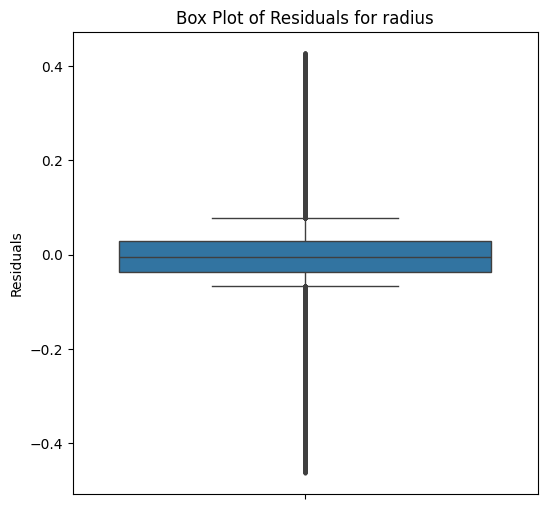

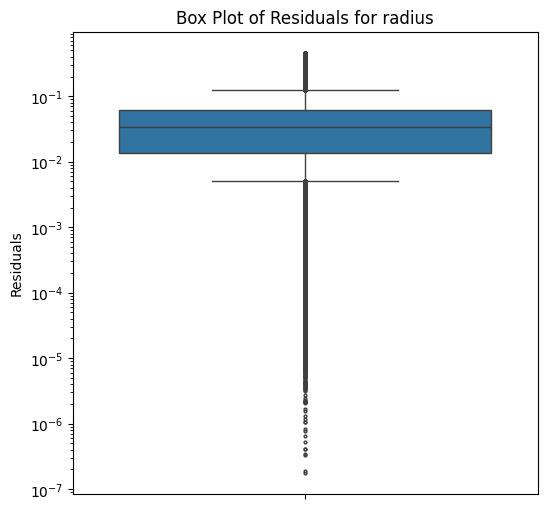

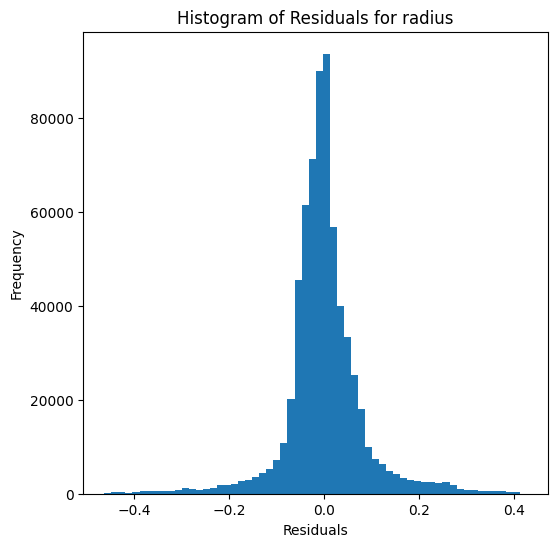

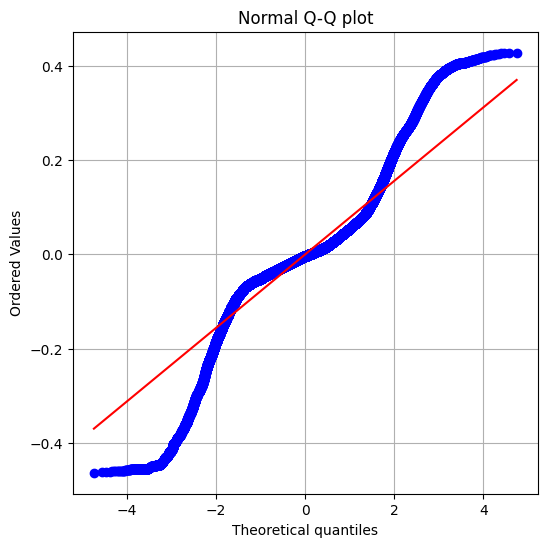

In [11]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [12]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


radius_bigger_0_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9949260615701665
RMSE :  1.6285356623918867
MAE :  0.1710597872891434
MedAE :  0.007134890646800729
CORR :  0.9974603195425689
MAX_ER :  181.74427876914615
Percentiles : 
  75th percentile :  0.045819469017393866
  90th percentile :  0.1758907820135458
  95th percentile :  0.34232226927698095
  99th percentile :  2.980599187372911



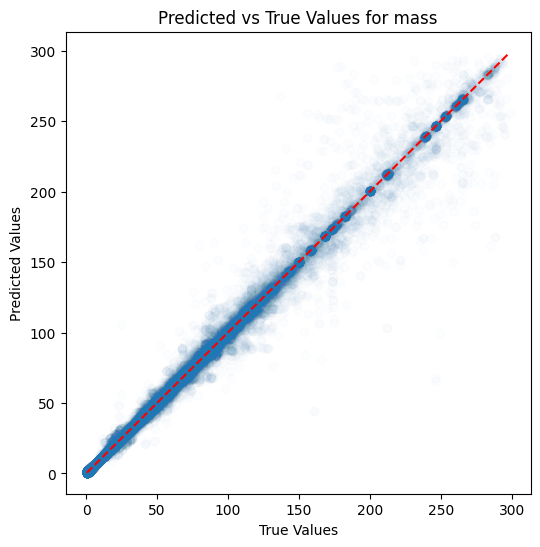

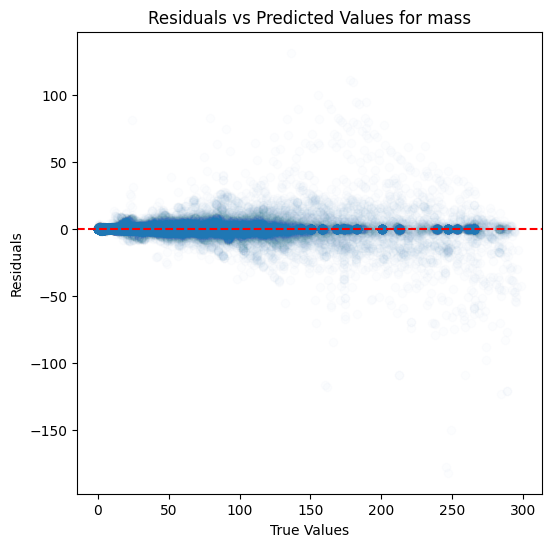

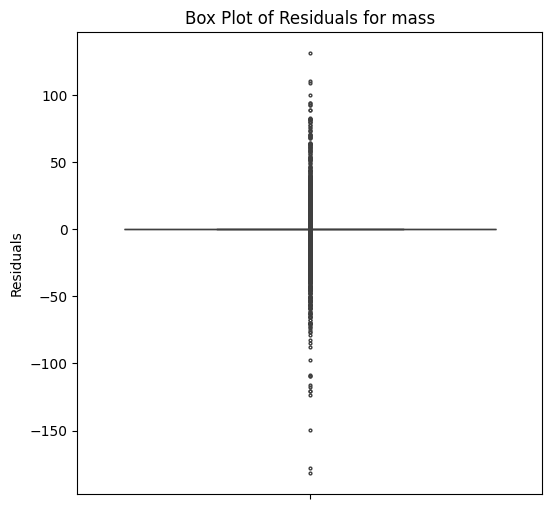

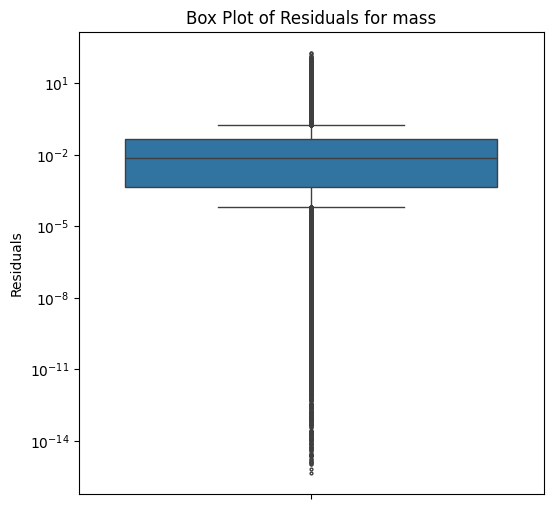

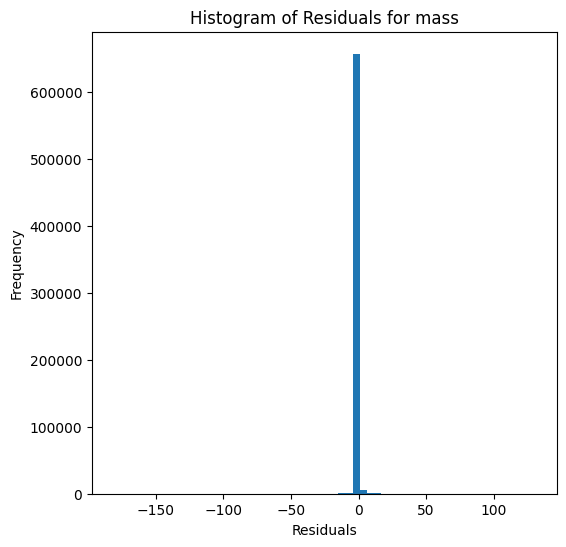

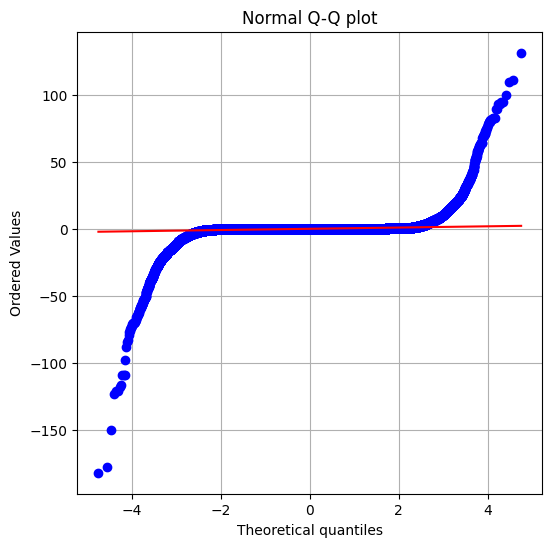


radius results:
RVE :  0.9994650629520062
RMSE :  0.01545470744472594
MAE :  0.008315501528738263
MedAE :  0.004360160358237275
CORR :  0.9997326205114415
MAX_ER :  0.620569251251075
Percentiles : 
  75th percentile :  0.00960933765386085
  90th percentile :  0.01909087205874637
  95th percentile :  0.030200359374258638
  99th percentile :  0.06619818899502022



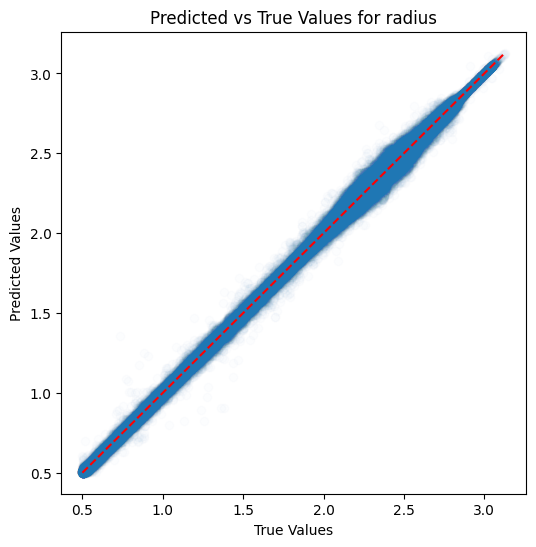

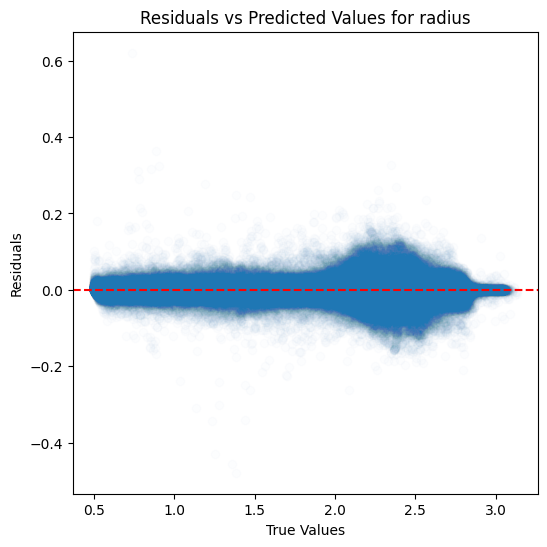

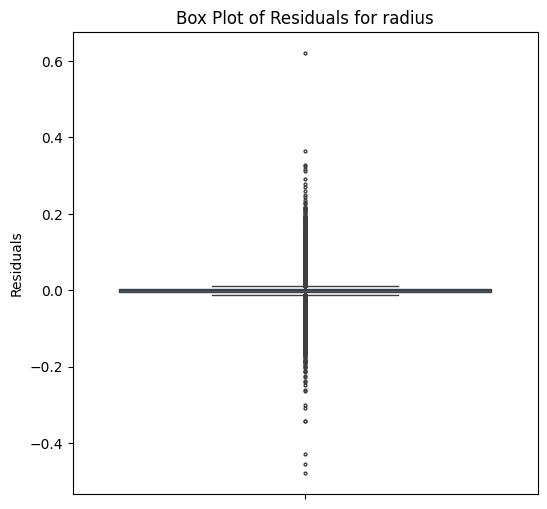

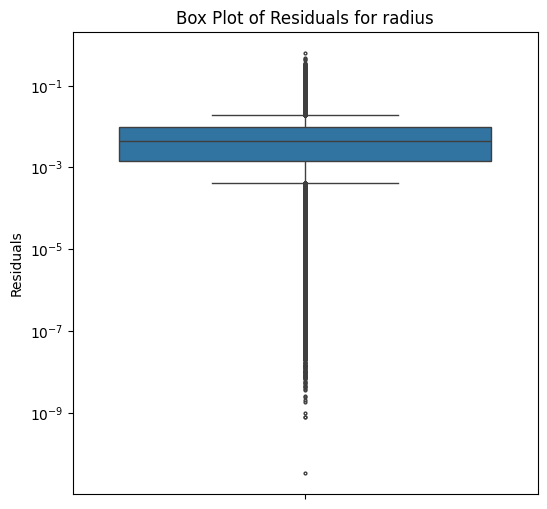

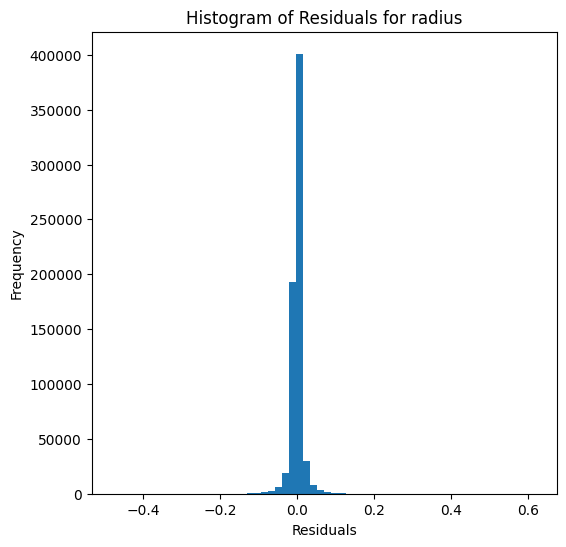

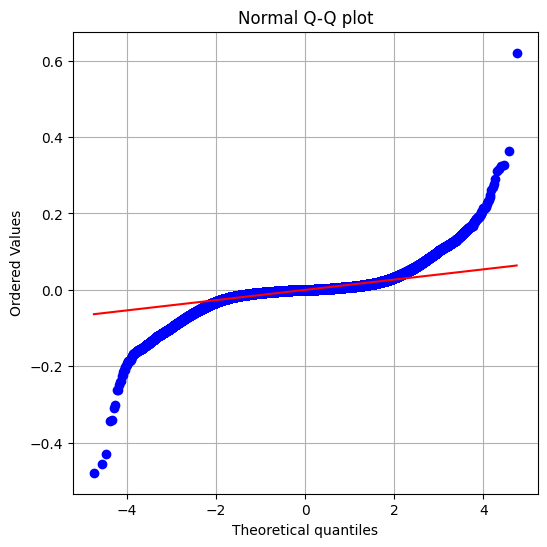

In [13]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [14]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


radius_bigger_0_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9902978236861779
RMSE :  2.252230205760867
MAE :  0.26277150509971586
MedAE :  0.021388677737960826
CORR :  0.9952314747654682
MAX_ER :  150.25914745151312
Percentiles : 
  75th percentile :  0.08663872411262952
  90th percentile :  0.23619684727273668
  95th percentile :  0.4860031230548943
  99th percentile :  4.683963623913513



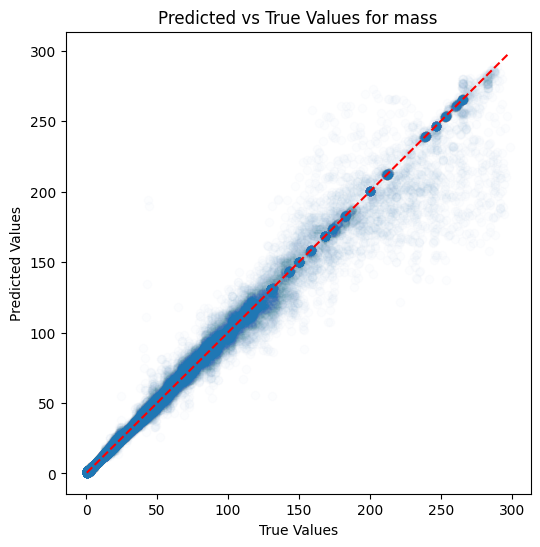

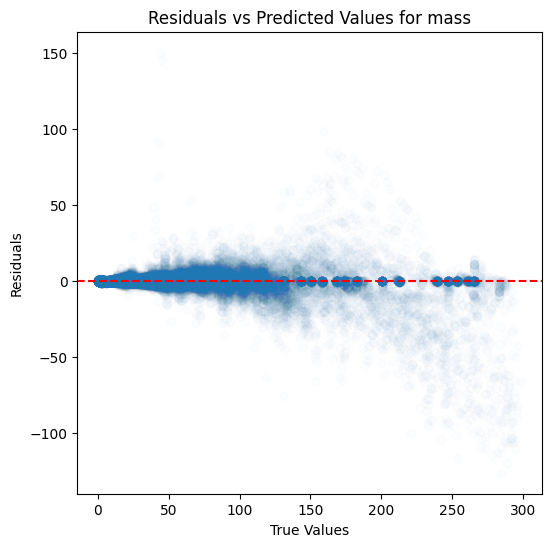

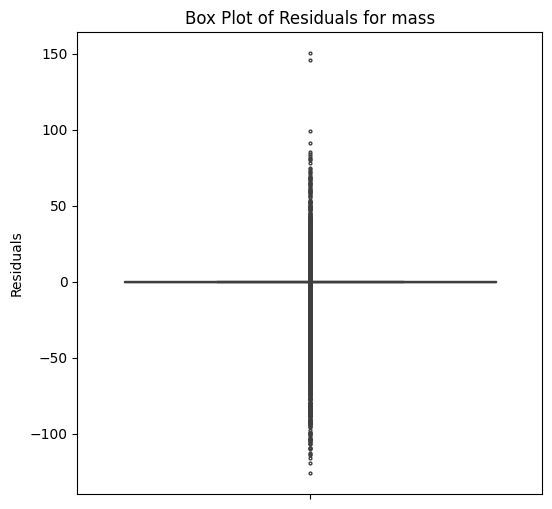

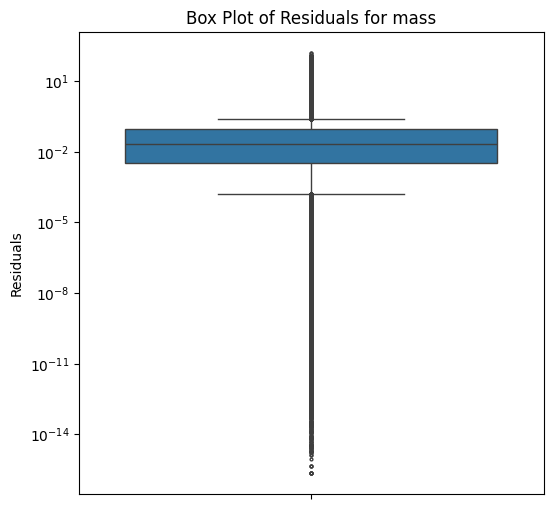

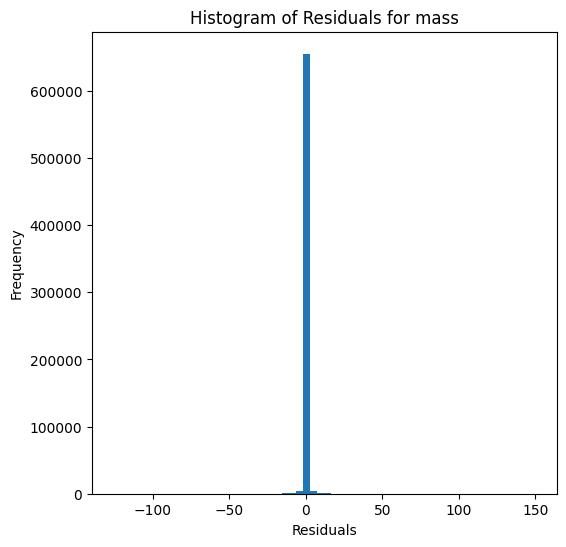

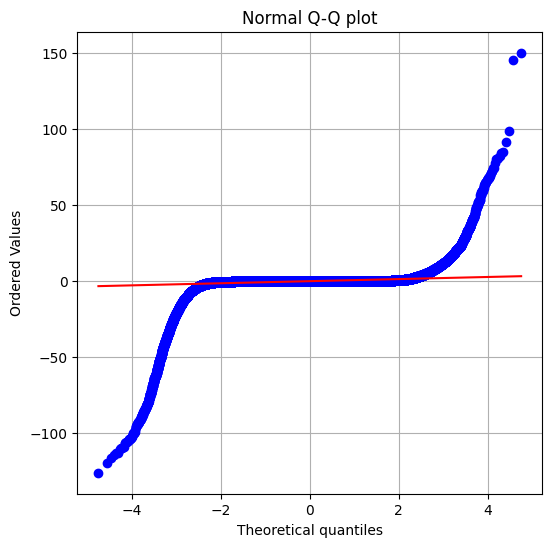


radius results:
RVE :  0.9995902585445687
RMSE :  0.013526499767384405
MAE :  0.0072856615886338705
MedAE :  0.0034231269588503865
CORR :  0.9997951556909712
MAX_ER :  0.329543015750684
Percentiles : 
  75th percentile :  0.008313586349104451
  90th percentile :  0.018089083103548415
  95th percentile :  0.028452993452933697
  99th percentile :  0.057246364639783415



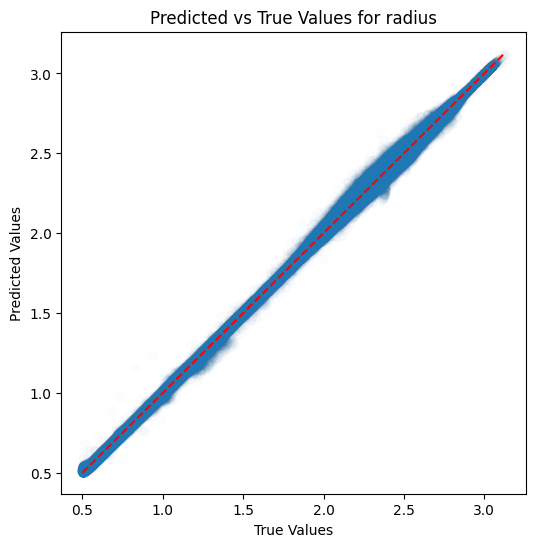

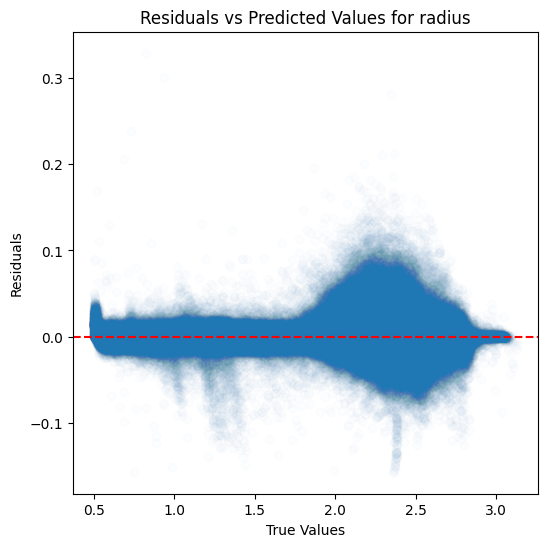

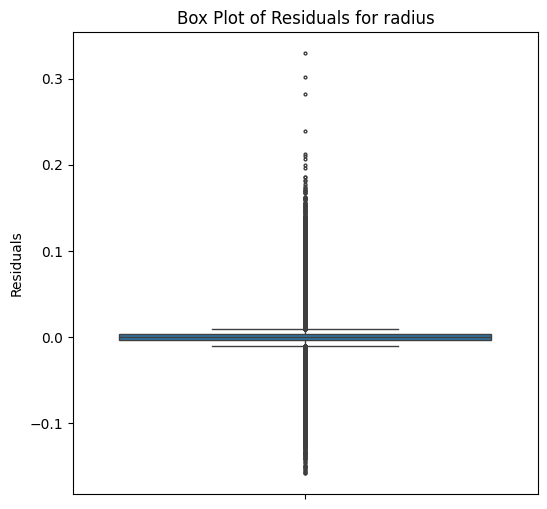

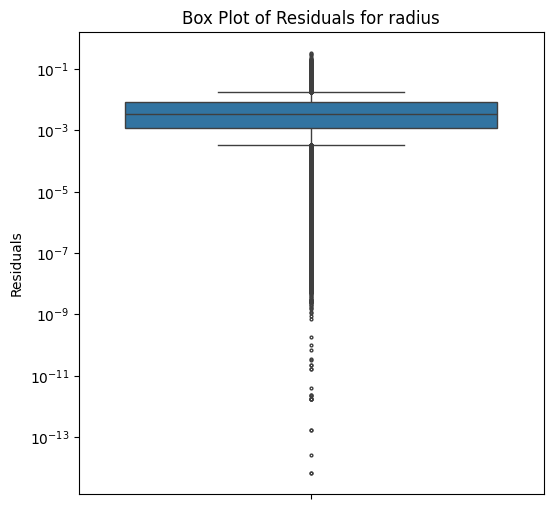

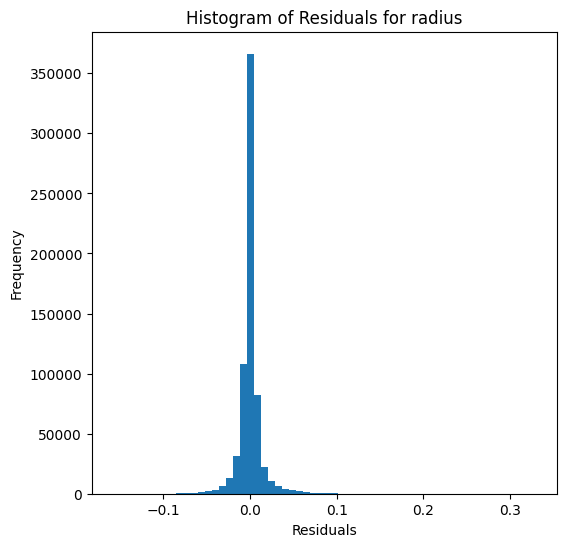

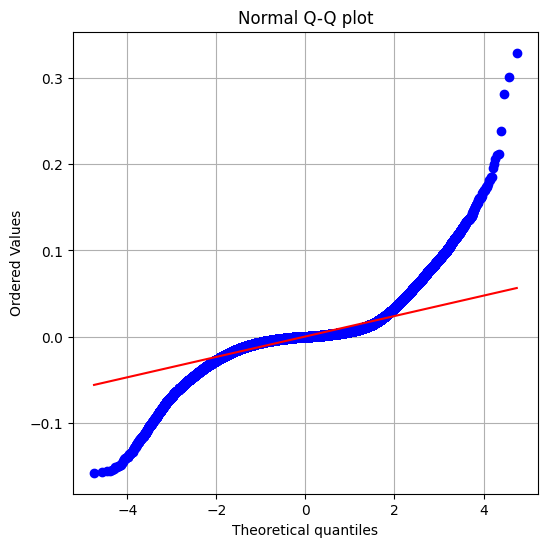

In [15]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [16]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


radius_bigger_0_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.997860226573911
RMSE :  1.0575688709895685
MAE :  0.12589747253219594
MedAE :  0.012719756352855938
CORR :  0.9989314202766059
MAX_ER :  90.20049983694966
Percentiles : 
  75th percentile :  0.04840835841478697
  90th percentile :  0.13812649340522068
  95th percentile :  0.25983729556659574
  99th percentile :  2.1000171712848674



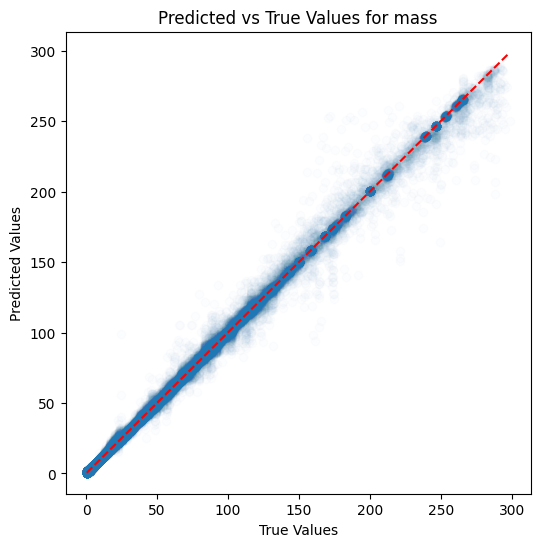

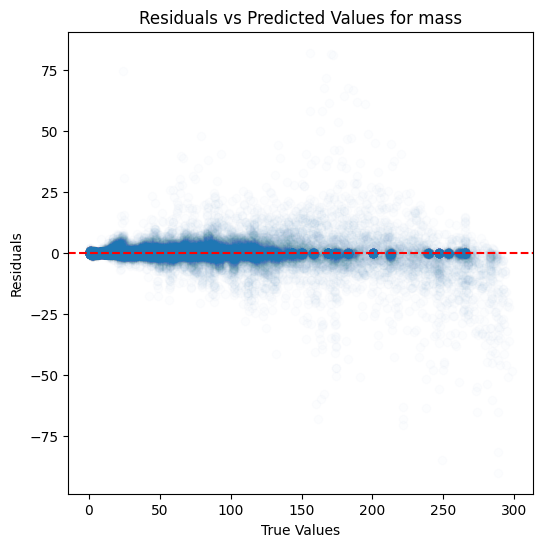

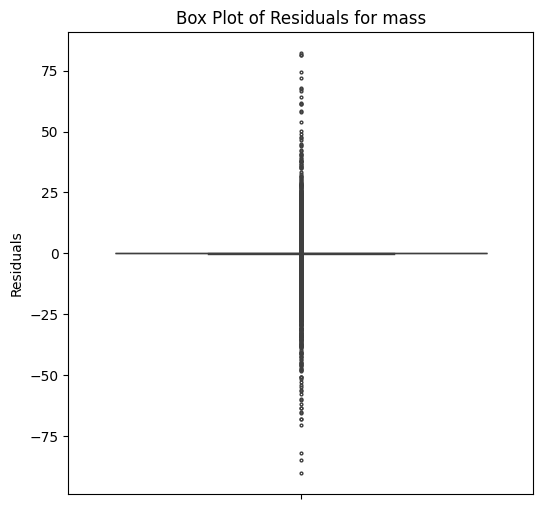

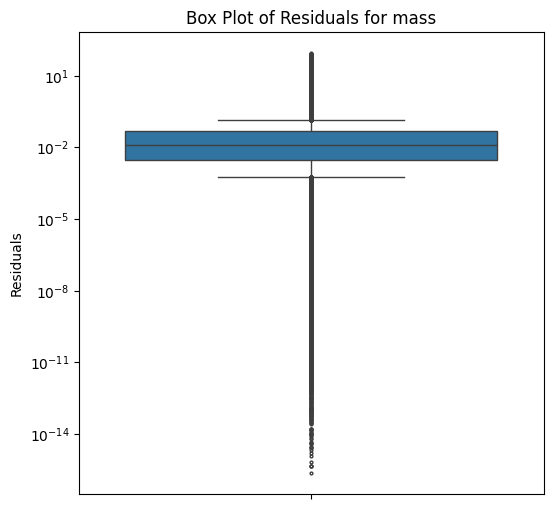

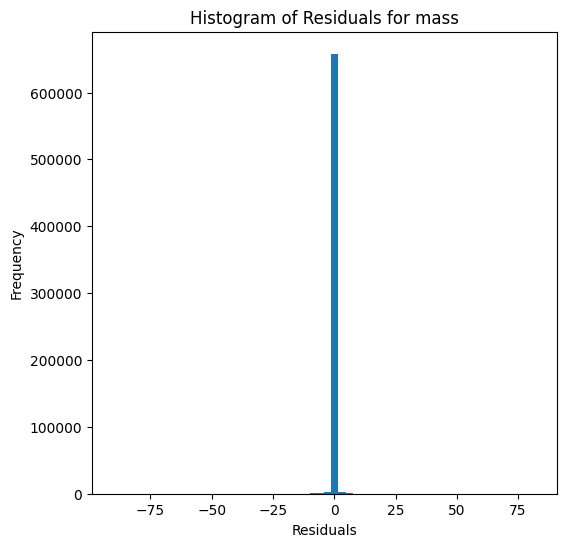

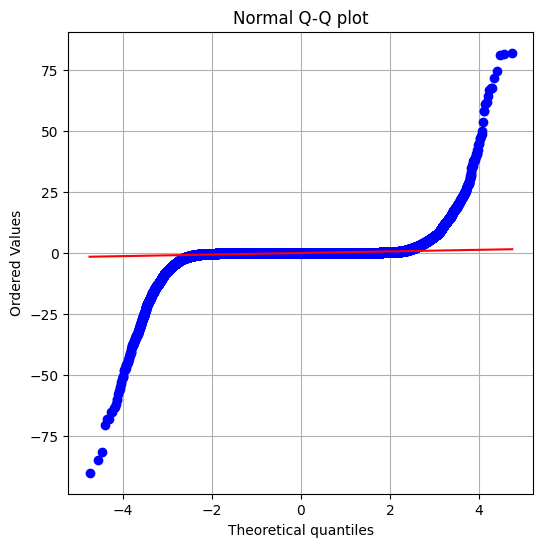


radius results:
RVE :  0.9997528321685418
RMSE :  0.01050581559721543
MAE :  0.005520598145422033
MedAE :  0.0025622103899449744
CORR :  0.9998764130362965
MAX_ER :  0.27567381489809595
Percentiles : 
  75th percentile :  0.006371818741292223
  90th percentile :  0.013488543296612306
  95th percentile :  0.02071163679875174
  99th percentile :  0.04482632193643408



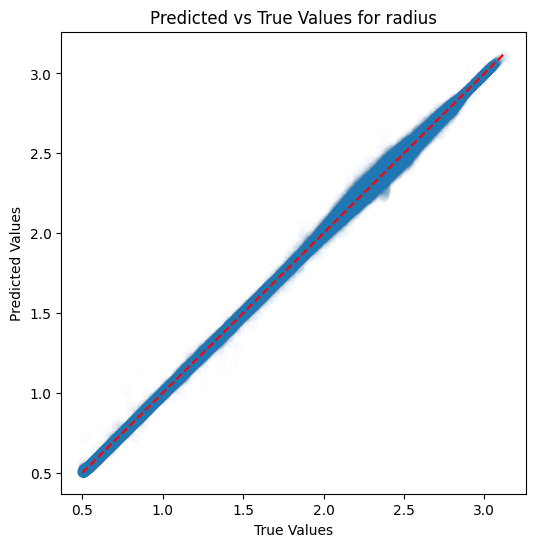

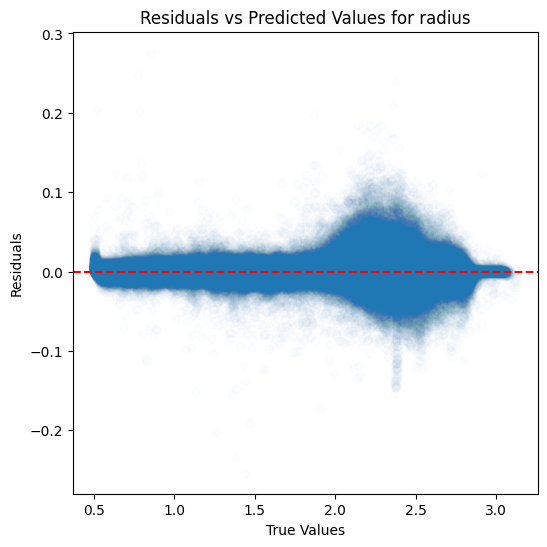

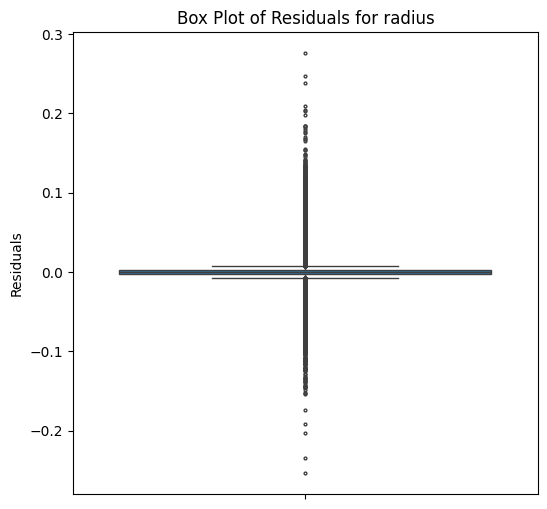

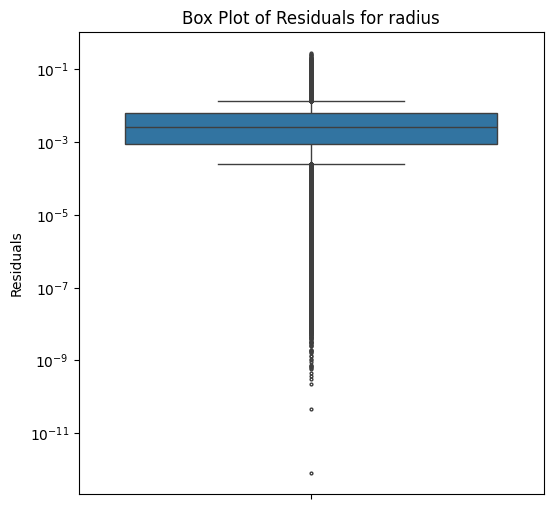

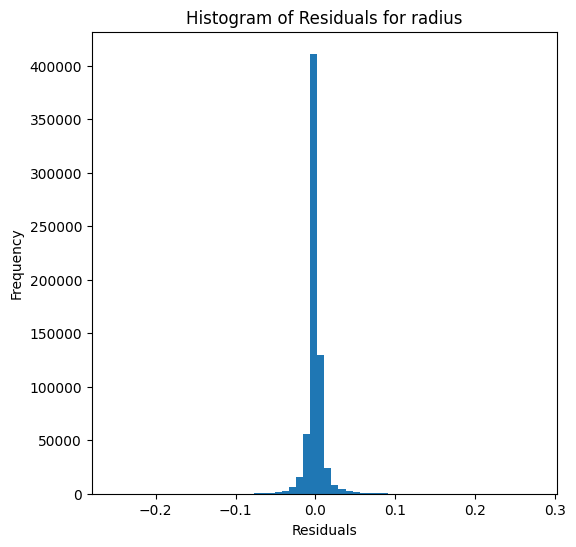

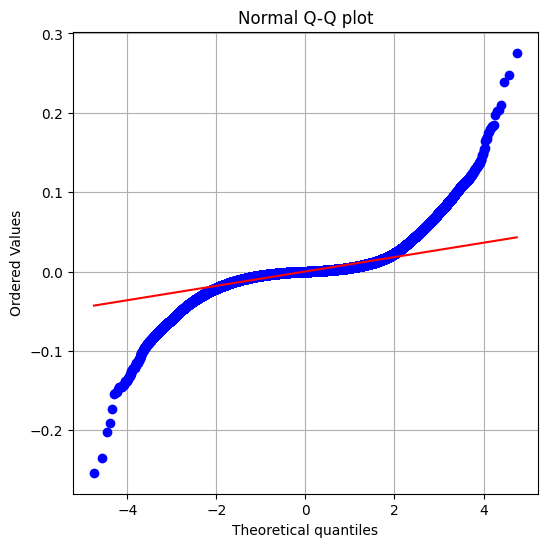

In [17]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [18]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


radius_bigger_0_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9866505013764719
RMSE :  2.6415390760637365
MAE :  0.4797794388108713
MedAE :  0.10053508697845004
CORR :  0.9933029840713999
MAX_ER :  140.89668133174808
Percentiles : 
  75th percentile :  0.2393584005785061
  90th percentile :  0.5921809119534119
  95th percentile :  1.4912621752760167
  99th percentile :  7.354716842523385



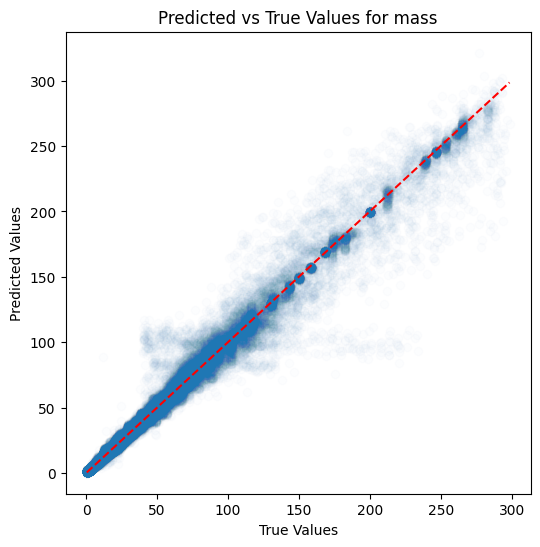

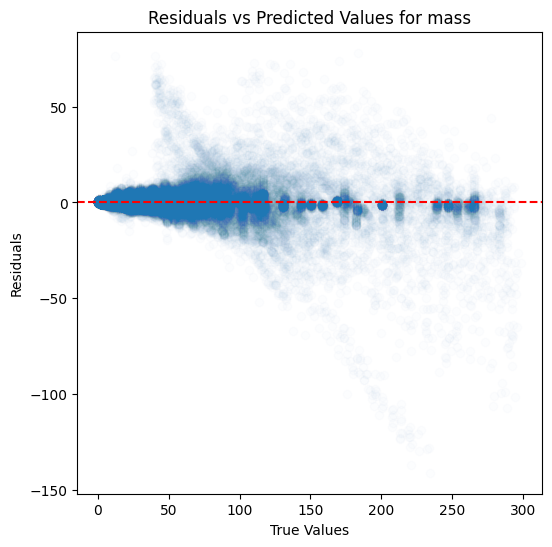

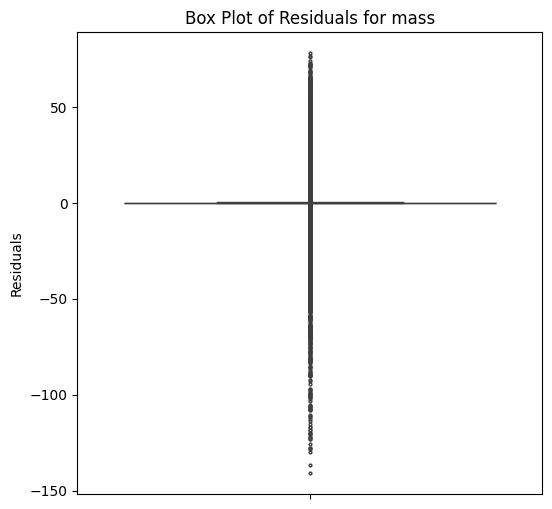

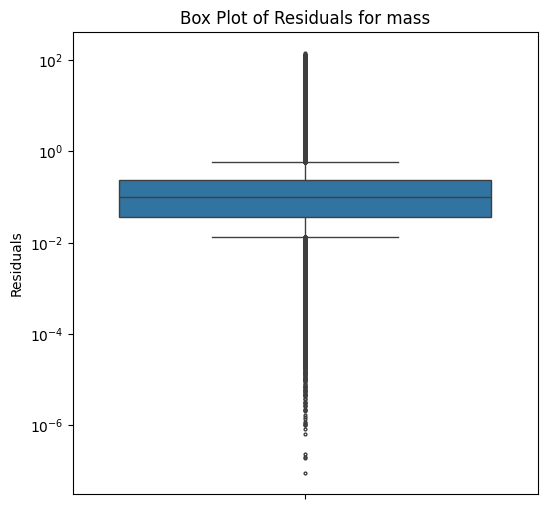

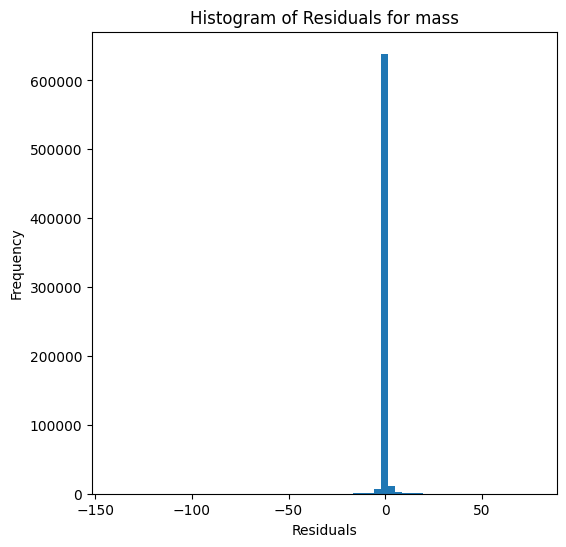

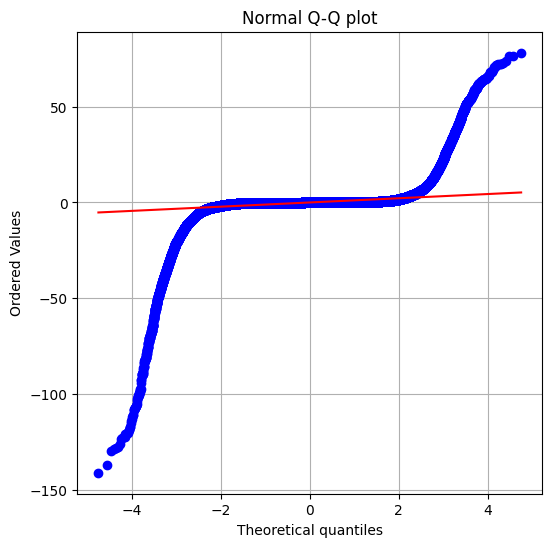


radius results:
RVE :  0.9991698370129394
RMSE :  0.01925198563116067
MAE :  0.013943036200245845
MedAE :  0.010476710391132071
CORR :  0.9995848506323168
MAX_ER :  0.2893317284573903
Percentiles : 
  75th percentile :  0.0189102187964022
  90th percentile :  0.02975869448944577
  95th percentile :  0.03837381201624234
  99th percentile :  0.06268662217535415



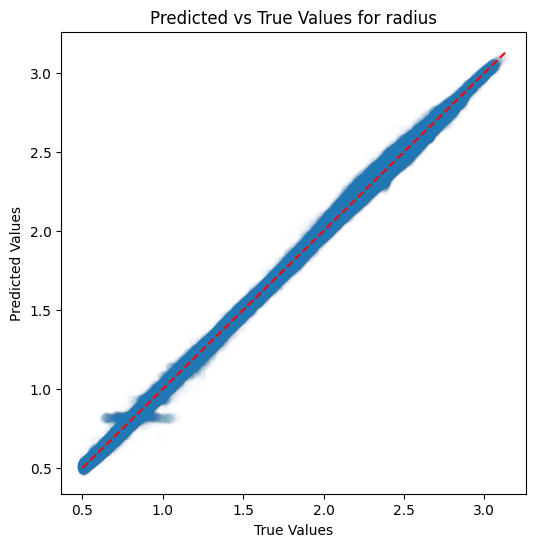

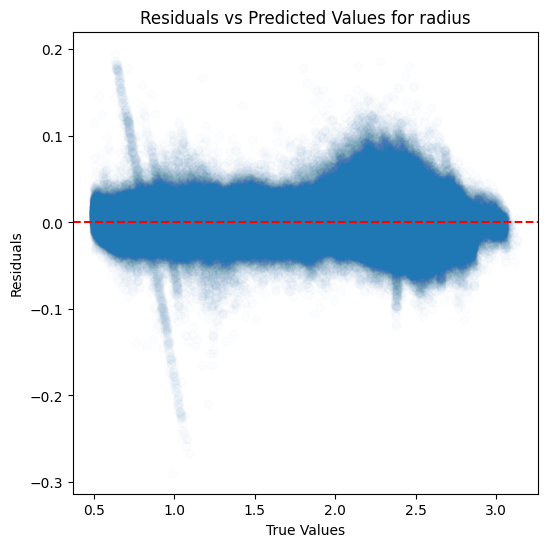

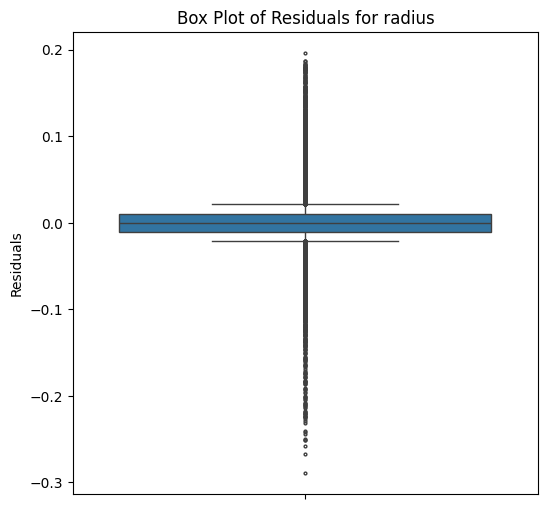

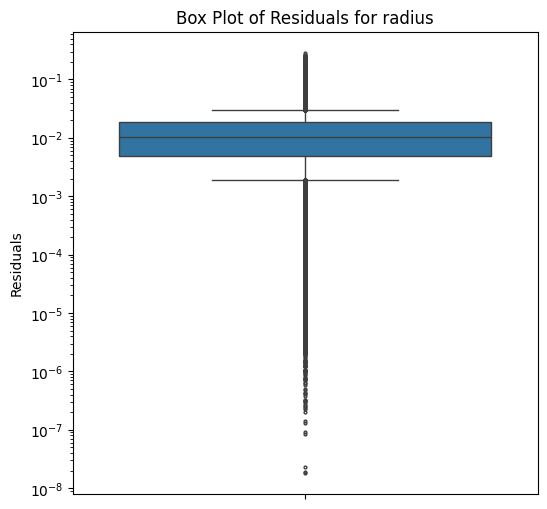

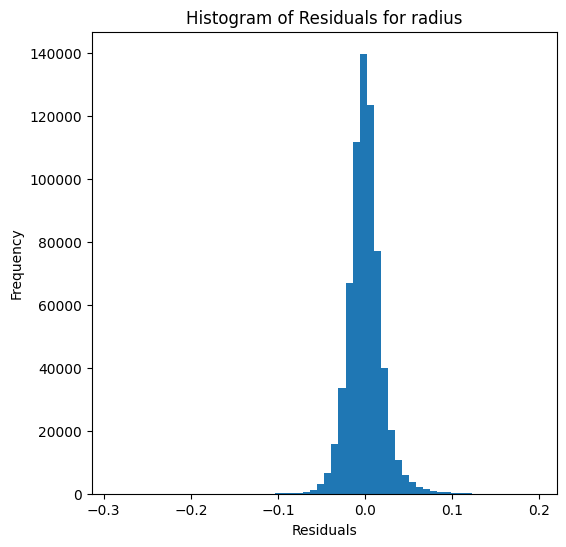

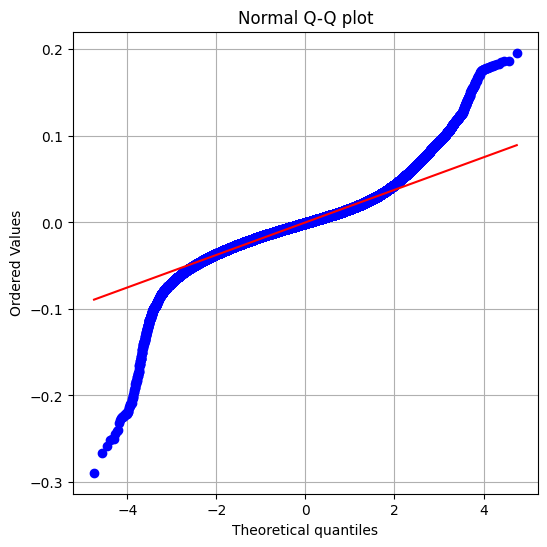

In [19]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [10]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


radius_bigger_0_5 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.445137273063239
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.4127523807816664
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.3741919229679325
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.418012267980132
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.693594950293393

mass results:
RVE :  0.9832837955867482
RMSE :  2.95623214039073
MAE :  0.7445591538098152
MedAE :  0.1994148748355749
CORR :  0.9916066760070767
MAX_ER :  166.56243047698177
Percentiles : 
  75th percentile :  0.3883718225603465
  90th percentile :  0.9313768486620745
  95th percentile :  2.792698736671942
  99th percentile :  12.317303467849452



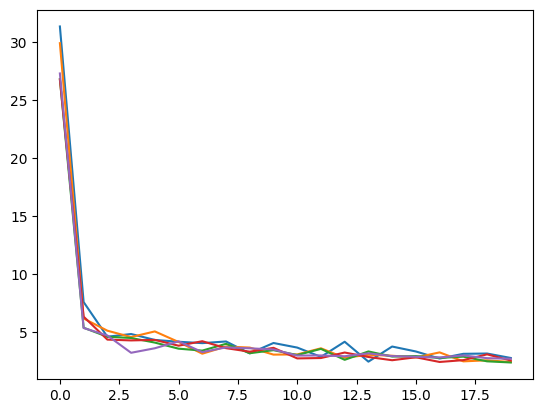

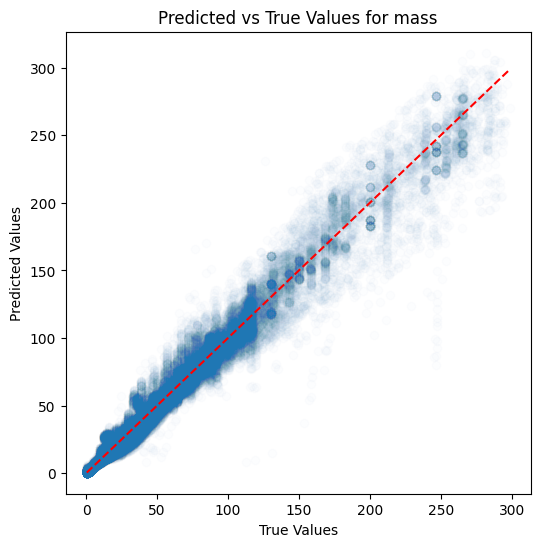

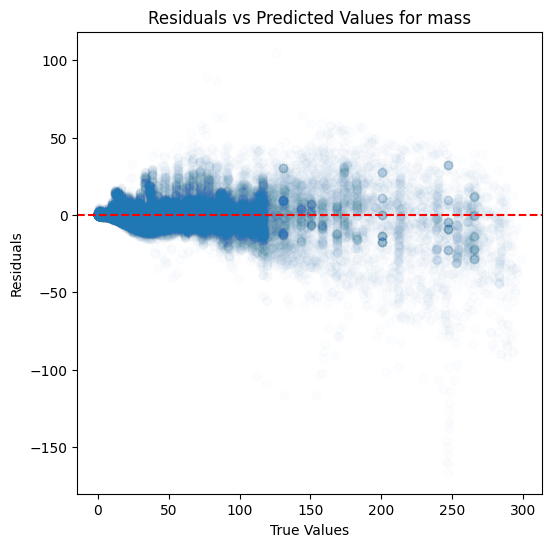

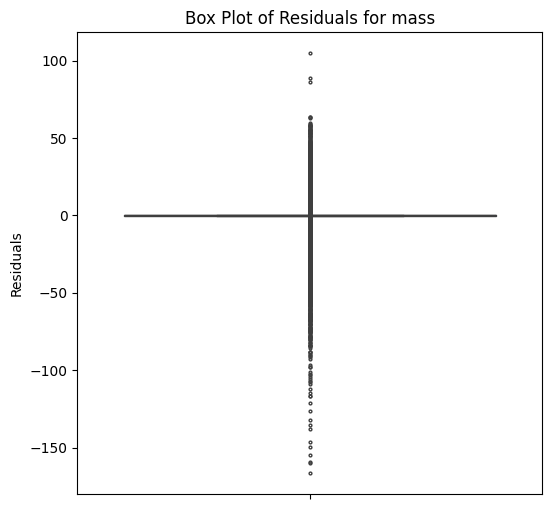

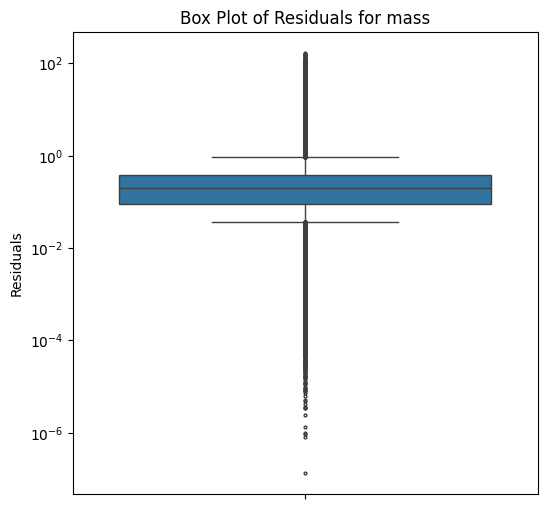

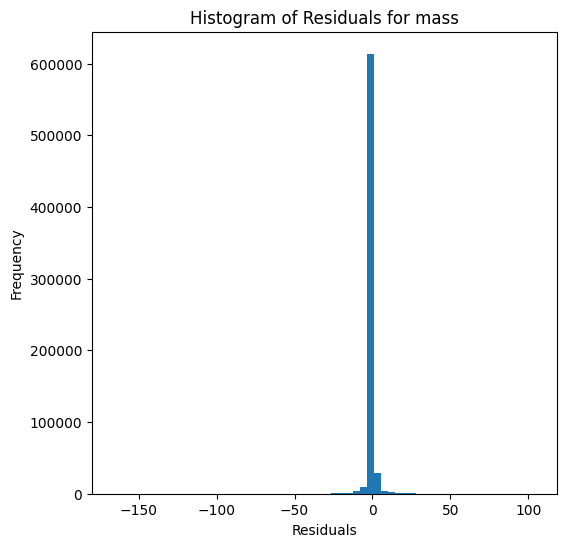

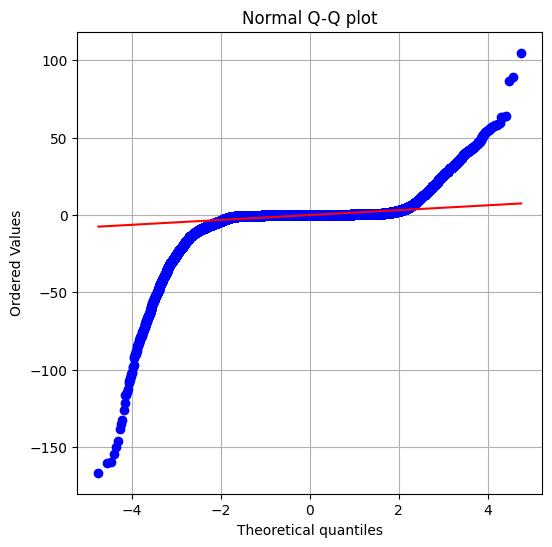


radius results:
RVE :  0.9893041574812524
RMSE :  0.07172411869353122
MAE :  0.05471773917815894
MedAE :  0.043893857839581996
CORR :  0.9947221862995812
MAX_ER :  0.7123155400934473
Percentiles : 
  75th percentile :  0.07590770105993905
  90th percentile :  0.11358273841767035
  95th percentile :  0.143992709892801
  99th percentile :  0.2128536390043001



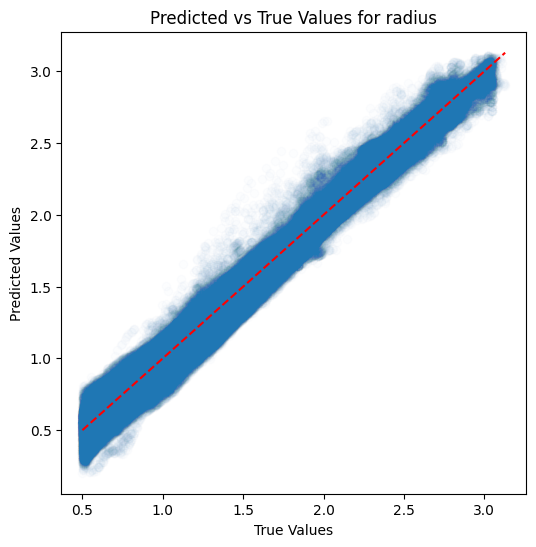

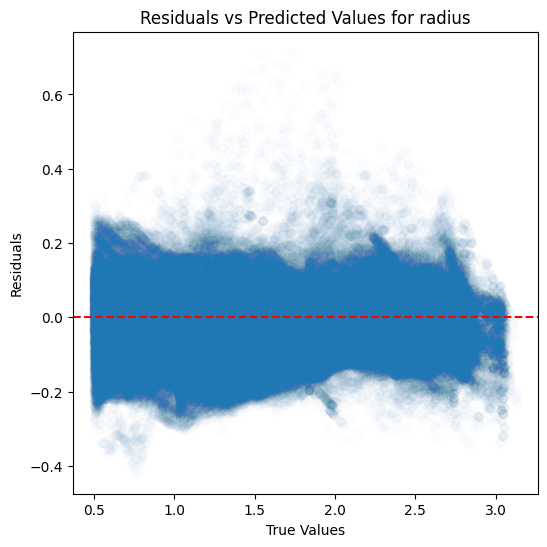

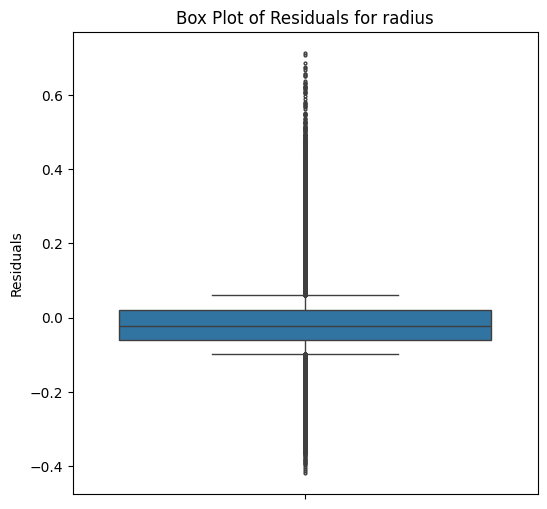

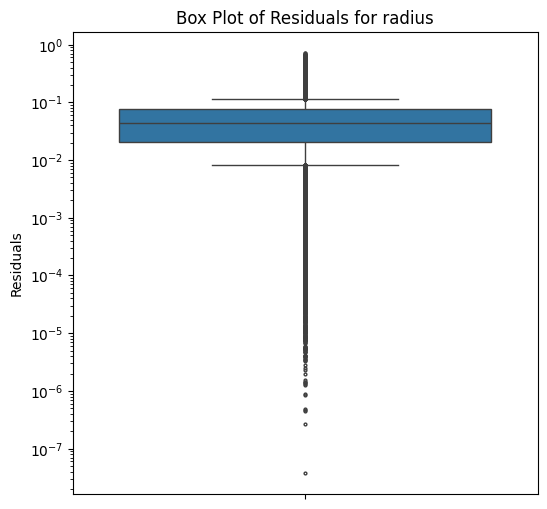

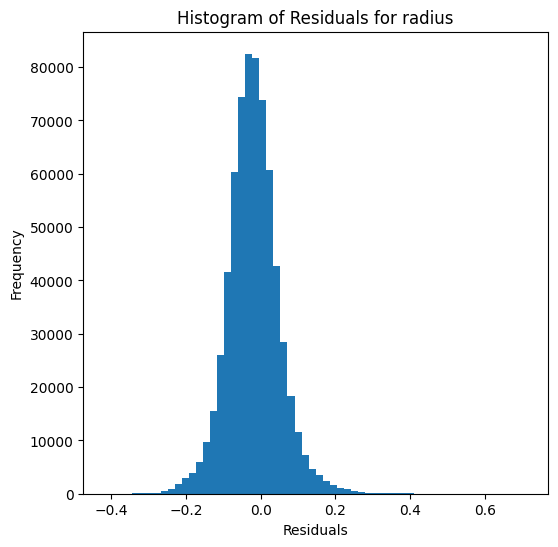

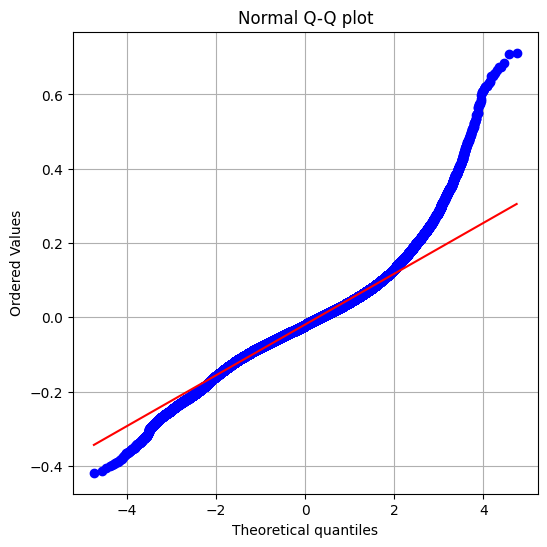

In [11]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)